In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
import math

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data = TabularDataset(f'Data/phil_rangedata_train.csv')
train_data.head()

,Initial SOC,Final SOC,Altitude Difference,Average Speed,Final Accumulated Distance
0,47.058838,25.490204,-99.106378,30.352603,54604.341629
1,82.745125,78.431396,-15.233335,28.810930,17257.400153
2,85.882378,81.568657,101.392726,27.704224,16593.307234
3,83.137283,78.823555,-0.943887,21.467391,12855.031758
4,39.607857,31.764715,-72.547066,30.345322,18176.565677


In [3]:
label = 'Final SOC'
train_data[label].describe()

count    1828.000000
mean       64.092254
std        24.591743
min        11.764709
25%        42.352955
50%        69.803947
75%        85.098068
max       100.000031
Name: Final SOC, dtype: float64

In [4]:
predictor = TabularPredictor(label=label,eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets='best_quality', 
    time_limit = 10*60,
    verbosity=1) 

No path specified. Models will be saved in: "AutogluonModels/ag-20230403_154931/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [5]:
test_data = TabularDataset(f'Data/phil_rangedata_test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

0    78.804489
1    72.322540
2    54.895981
3    57.290909
4    63.743786
Name: Final SOC, dtype: float32

In [6]:
predictor.evaluate(test_data, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -6.779845022657658,
 'mean_squared_error': -45.966298531255816,
 'mean_absolute_error': -5.422667312327893,
 'r2': 0.9147543698889734,
 'pearsonr': 0.9603244678288715,
 'median_absolute_error': -4.7173042281103506}

In [7]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch_BAG_L1,-6.591861,-2.239384,0.060907,0.080483,15.440139,0.060907,0.080483,15.440139,1,True,10
1,WeightedEnsemble_L2,-6.779845,-1.997467,0.593709,0.304625,59.644651,0.004263,0.000561,0.292546,2,True,12
2,NeuralNetFastAI_BAG_L1,-6.827123,-2.113075,0.104631,0.069142,12.332497,0.104631,0.069142,12.332497,1,True,8
3,NeuralNetFastAI_BAG_L2,-7.034598,-2.088720,1.290181,0.996797,92.313560,0.198923,0.139724,30.172508,2,True,18
4,WeightedEnsemble_L3,-7.429885,-2.072941,1.923739,1.603788,148.293760,0.004214,0.000330,0.163311,3,True,22
5,NeuralNetTorch_BAG_L2,-7.443494,-2.212408,1.219923,1.035834,92.402257,0.128665,0.178761,30.261206,2,True,20
6,LightGBM_BAG_L2,-7.774950,-2.176415,1.136339,0.879971,64.098021,0.045081,0.022898,1.956969,2,True,14
7,XGBoost_BAG_L2,-7.909911,-2.174247,1.263737,0.931093,82.390264,0.172479,0.074020,20.249212,2,True,19
8,LightGBMLarge_BAG_L2,-8.181551,-2.231492,1.353858,0.887691,67.332343,0.262599,0.030618,5.191291,2,True,21
9,ExtraTreesMSE_BAG_L2,-8.245123,-2.120638,1.238045,0.992751,62.955813,0.146787,0.135678,0.814761,2,True,17


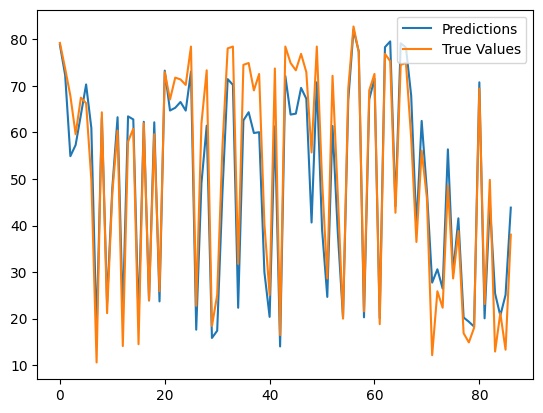

In [8]:
#plots the predicted vs actual values of the top performing model using matplotlib
import matplotlib.pyplot as plt
plt.plot(y_pred, label="Predictions")
plt.plot(test_data[label], label="True Values")
plt.legend()
plt.show()

In [9]:
mse_test = np.mean(((y_pred - test_data[label])**2))
rmse_test = math.sqrt(mse_test)
print("test data rmse", rmse_test)

test data rmse 6.779845022657658
